In [194]:
# importing libraries
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import time
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.regularizers import l1, l2
import matplotlib.pyplot as plt
from bokeh.models.formatters import NumeralTickFormatter
from sklearn.model_selection import train_test_split

In [195]:
all_values = pd.read_csv(Path("Resources/all_values.csv"))
all_values['date'] = pd.to_datetime(all_values['date'], format='%Y-%m')
all_values.set_index('date', inplace=True)
#all_values.index = all_values.index.strftime('%Y-%m')

In [196]:
y = all_values["Composite"]

In [197]:
#X = all_values.drop(columns = "Composite")
X = all_values[["Shelter"]]

In [198]:
#y.plot()
y_plot = y.hvplot.line(
    x='Date', 
    xlabel='Date', 
    ylabel='Price Index', 
    title='Composite Benchmark',
    line_color='blue',
    rot=90,
    height=500,
    width=500
).opts(
    fontsize={
        'title': 20, 
        'labels': 14, 
        'xticks': 5, 
        'yticks': 10,
    },
    yformatter=NumeralTickFormatter(format="0,0")
)
y_plot

:Curve   [Date]   (Composite)

In [199]:
#X.plot()
X_plot = X.hvplot.line(
    x='Date', 
    xlabel='Date', 
    ylabel='Index', 
    title='Shelter CPI',
    line_color='blue',
    rot=90,
    height=500,
    width=500
).opts(
    fontsize={
        'title': 20, 
        'labels': 14, 
        'xticks': 5, 
        'yticks': 10,
    },
    yformatter=NumeralTickFormatter(format="0,0")
)
X_plot

:Curve   [Date]   (Shelter)

In [200]:
#training_begin = X.index.min()
#print(training_begin)
#training_end = X.index.min() + DateOffset(months=50)
#print(training_end)

In [201]:
#X_train = X.loc[training_begin:training_end]
#y_train = y.loc[training_begin:training_end]

In [202]:
#X_test = X.loc[training_end:]
#y_test = y.loc[training_end:]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [204]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [205]:
# Save the count of unique predictor variables for use in model
number_of_predictors = len(X.columns)
len(X.columns)

1

In [226]:
# Build the Model
model = Sequential()
# Add a dense layer 
model.add(Dense(10, input_dim=number_of_predictors, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='linear'))

#model.add(Dense(100000, input_dim=240000, activation='relu'))
# Now add a dropout layer
#model.add(Dropout(.2,input_shape=(10000,)))
# Add regularization to another dense layer
#model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

In [227]:
# Add the final output layer
#model.add(Dense(50, activation='linear'))

In [228]:
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
#model.compile(loss='mean_absolute_error', optimizer='adam')

In [229]:
# Summarise the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 10)                20        
                                                                 
 dense_48 (Dense)            (None, 24)                264       
                                                                 
 dense_49 (Dense)            (None, 1)                 25        
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [230]:
number_of_epochs = 200
model.fit(X_train_scaled,y_train, 
                    epochs=number_of_epochs,
                    batch_size=30,
                    validation_split=0.2,
                    shuffle=True)

Epoch 1/200
4/4 [==============================] - 1s 79ms/step - loss: 327806976000.0000 - val_loss: 327586906112.0000
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 327806943232.0000 - val_loss: 327586873344.0000
Epoch 3/200
4/4 [==============================] - 0s 17ms/step - loss: 327806877696.0000 - val_loss: 327586807808.0000
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 327806877696.0000 - val_loss: 327586742272.0000
Epoch 5/200
4/4 [==============================] - 0s 18ms/step - loss: 327806779392.0000 - val_loss: 327586676736.0000
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 327806713856.0000 - val_loss: 327586676736.0000
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 327806681088.0000 - val_loss: 327586611200.0000
Epoch 8/200
4/4 [==============================] - 0s 16ms/step - loss: 327806681088.0000 - val_loss: 327586545664.0000
Epoch 9/200
4/4 [=======================

In [231]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [232]:
predictions

array([[26297.133],
       [27729.467],
       [23761.516],
       [25619.678],
       [24864.799],
       [28387.564],
       [26897.162],
       [23626.025],
       [30690.912],
       [26839.096],
       [23684.092],
       [24032.498],
       [26877.807],
       [24729.31 ],
       [27864.957],
       [27361.703],
       [28968.24 ],
       [24419.613],
       [27671.4  ],
       [24284.123],
       [24806.732],
       [25832.592],
       [31949.043],
       [25851.947],
       [24671.24 ],
       [26084.22 ],
       [24709.951],
       [24264.768],
       [23645.38 ],
       [26761.674],
       [29355.355],
       [30071.521],
       [28968.24 ],
       [24071.209],
       [29548.916],
       [26219.709],
       [26200.354],
       [28523.055],
       [27013.3  ],
       [24768.021],
       [24864.799],
       [25019.646],
       [26548.758],
       [24516.395]], dtype=float32)

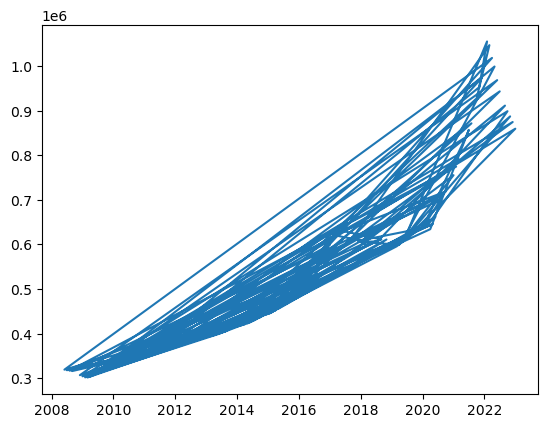

In [233]:
plt.plot(y_train)
plt.show()

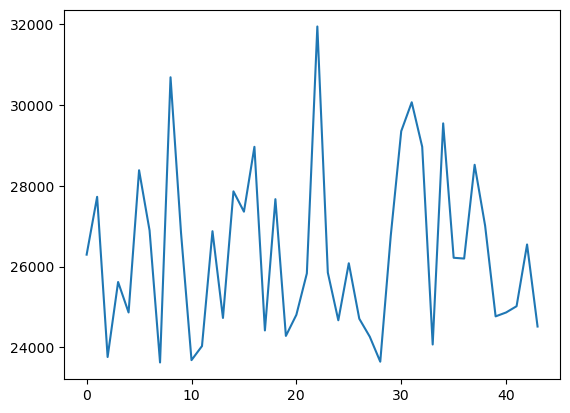

In [234]:
plt.plot(predictions)
plt.show()

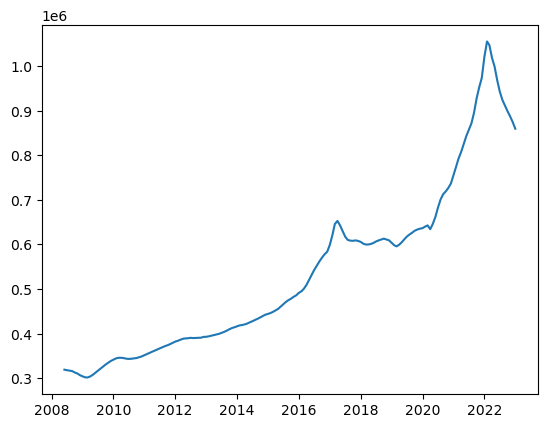

In [235]:
plt.plot(y)
plt.show()